# Wave Equation

## Samuel Goldrup

## Math 437

## The 3rd of Neural Net November, 2022

In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt
from matplotlib import animation as ani
from scipy.linalg import toeplitz
import scipy.optimize

# Problem 1
Numerically approximate the solution to the following BVP

$$
u_{tt} = u_{xx} \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = \sin(2\pi x), \\
u_t(x,0) = 0. 
$$

Numerically approximate the solution $u(x,t)$ for $t\in[0,5]$. Use $J=50$ subintervals in the $x$ dimension and $M=50$ subintervals in the $t$ dimension. Animate the results. Compare you results with the analytic solution $u(x,t) = \sin(2\pi x)\cos(2\pi t).$ This function is know as a standing wave.

In [2]:
M,J = 50,50 #t,x sizes
a_t,b_t = 0,.5 #a,b in time domain
a_x,b_x = 0,1 #a,b in x domain
s = 1
delt_t = (b_t-a_t)/M #discretize
delt_x = (b_x-a_x)/J
lambd = (s*delt_t)/delt_x
x_grid = np.linspace(a_x,b_x,J+1)
f = lambda x: np.sin(2*np.pi*x)
g = lambda x: np.zeros_like(x)

<IPython.core.display.Javascript object>


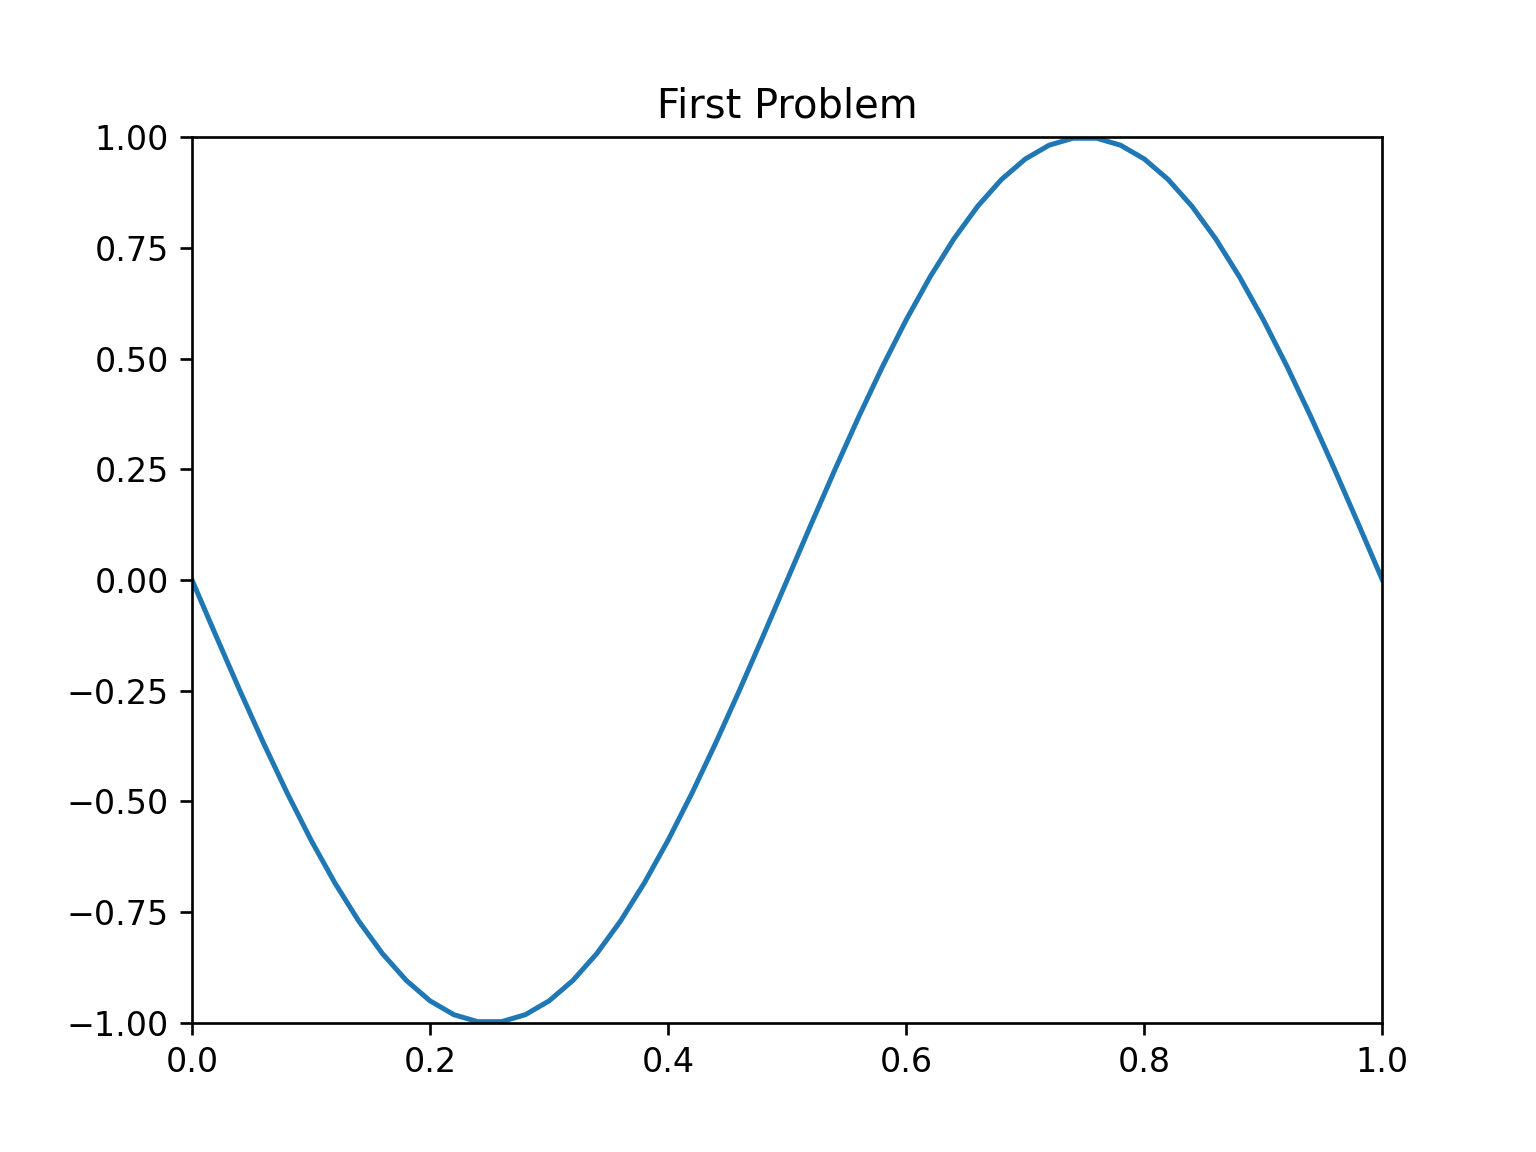

In [3]:
U = np.zeros((M+1,J+1)) #the solution at all M+1 time steps

U[0][1:-1] = f(x_grid[1:-1])
U[1][1:-1] = U[0][1:-1] + delt_t*g(x_grid[1:-1]) + (1/2)*(lambd**2)*(U[0][:-2] - 2*U[0][1:-1] + U[0][2:]) #setup

A = np.zeros((J+1, J+1))
np.fill_diagonal(A, 2*(1-lambd**2))
np.fill_diagonal(A[1:,:-1], lambd**2)
np.fill_diagonal(A[:-1, 1:], lambd**2) #build transformation matrix
#Calculate the rest of the rows of U
for i in range(2, M+1):
    U[i] = A@U[i-1] - U[i-2]
    U[i,0], U[i,-1] = 0,0


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1,1))
ax.set_title("First Problem")

line, = plt.plot([],[],)

def update(i):
    line.set_data(x_grid,U[i])
    return line

plt.show()

anim = ani.FuncAnimation(fig,update,frames=range(M+1),interval=10)
anim.save('prob1.mp4')

<video src="prob1.mp4" controls>

# Problem 2

Consider the boundary value problem 

$$
u_{tt} = u_{xx}, \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = 0.2e^{-,^2(x-1/2)^2} \\
y_t(x,0) = 0.4m^2(x-\frac{1}{2})e^{-m^2(x-1/2)^2}.
$$

The solution of this problem is ta Gaussian pulse. It travels to the right at a constant speed. This solution models, for example, a wave pulse in a stretched string. Note that the fixed boundart conditions reflect the pulse back when it meets the boundary.

Numerically approximate the solution $u(x,t)$ for $t\in[0,1]$. Set $m=20$. Use 200 subintervals in space and 220 in time, and animate your results. Then use 200 subintervals in space and 180 in time, and animate your results. Note that the stability condition is not satisfied for the second mesh.

In [4]:
J,M = 200, 180 #new conditions for new problem
m = 20 #m hyperparameter
f = lambda x: .2*np.exp(-m**2 * (x-.5)**2)
g = lambda x: .4*m**2 * (x-.5)*np.exp(-m**2 * (x-.5)**2)
s = 1
a_x,b_x = 0,1
a_t,b_t = 0,1
delt_t = (b_t-a_t)/M
delt_x = (b_x-a_x)/J
lambd = (s*delt_t)/delt_x
x_grid = np.linspace(a_x,b_x,J+1)

<IPython.core.display.Javascript object>


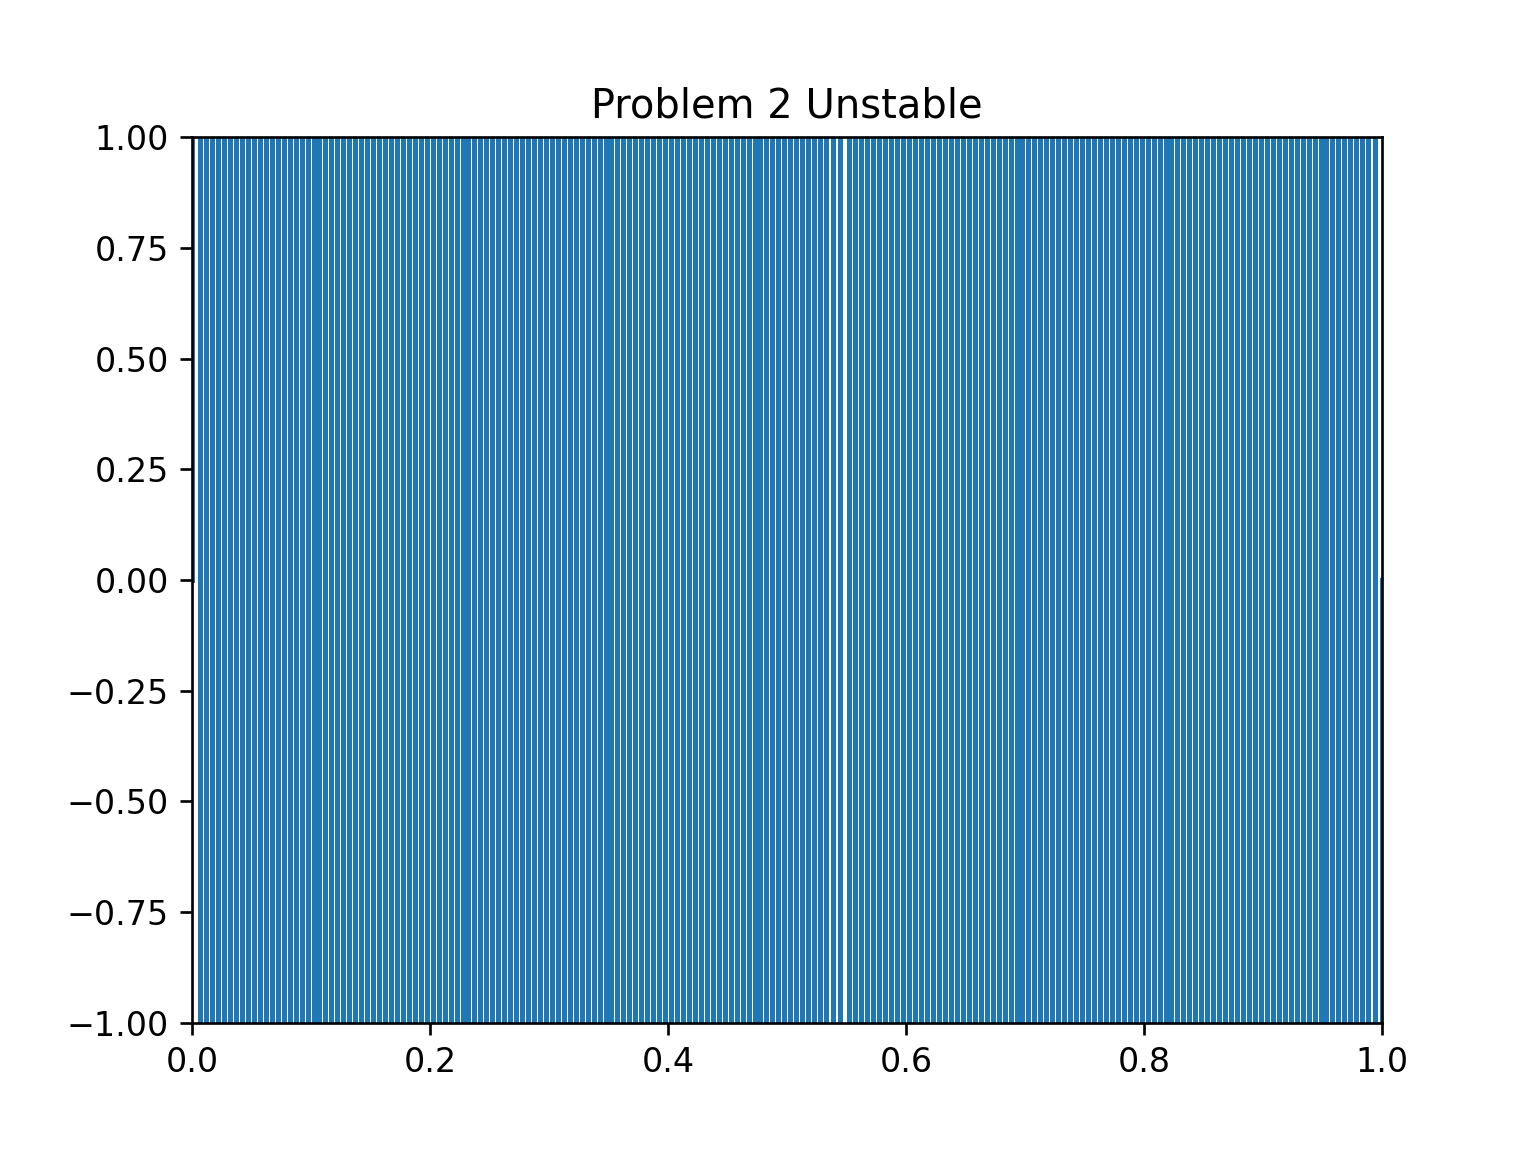

In [5]:
U = np.zeros((M+1,J+1)) #same method as in first problem

U[0][1:-1] = f(x_grid[1:-1])
U[1][1:-1] = U[0][1:-1] + delt_t*g(x_grid[1:-1]) + (1/2)*(lambd**2)*(U[0][:-2] - 2*U[0][1:-1] + U[0][2:])

A = np.zeros((J+1, J+1))
np.fill_diagonal(A, 2*(1-lambd**2))
np.fill_diagonal(A[1:,:-1], lambd**2)
np.fill_diagonal(A[:-1, 1:], lambd**2)
#Calculate the rest of the rows of U
for i in range(2, M+1):
    U[i] = A@U[i-1] - U[i-2]
    U[i,0], U[i,-1] = 0,0


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1,1))
ax.set_title("Problem 2 Unstable")

line, = plt.plot([],[],)

def update(i):
    line.set_data(x_grid,U[i])
    return line

plt.show()

anim = ani.FuncAnimation(fig,update,frames=range(M+1),interval=10)
anim.save('prob2.mp4')

In [6]:
J,M = 200, 220 #new conditions for new problem
m = 20 #m hyperparameter
f = lambda x: .2*np.exp(-m**2 * (x-.5)**2)
g = lambda x: .4*m**2 * (x-.5)*np.exp(-m**2 * (x-.5)**2)
s = 1
a_x,b_x = 0,1
a_t,b_t = 0,1
delt_t = (b_t-a_t)/M
delt_x = (b_x-a_x)/J
lambd = (s*delt_t)/delt_x
x_grid = np.linspace(a_x,b_x,J+1)

<IPython.core.display.Javascript object>


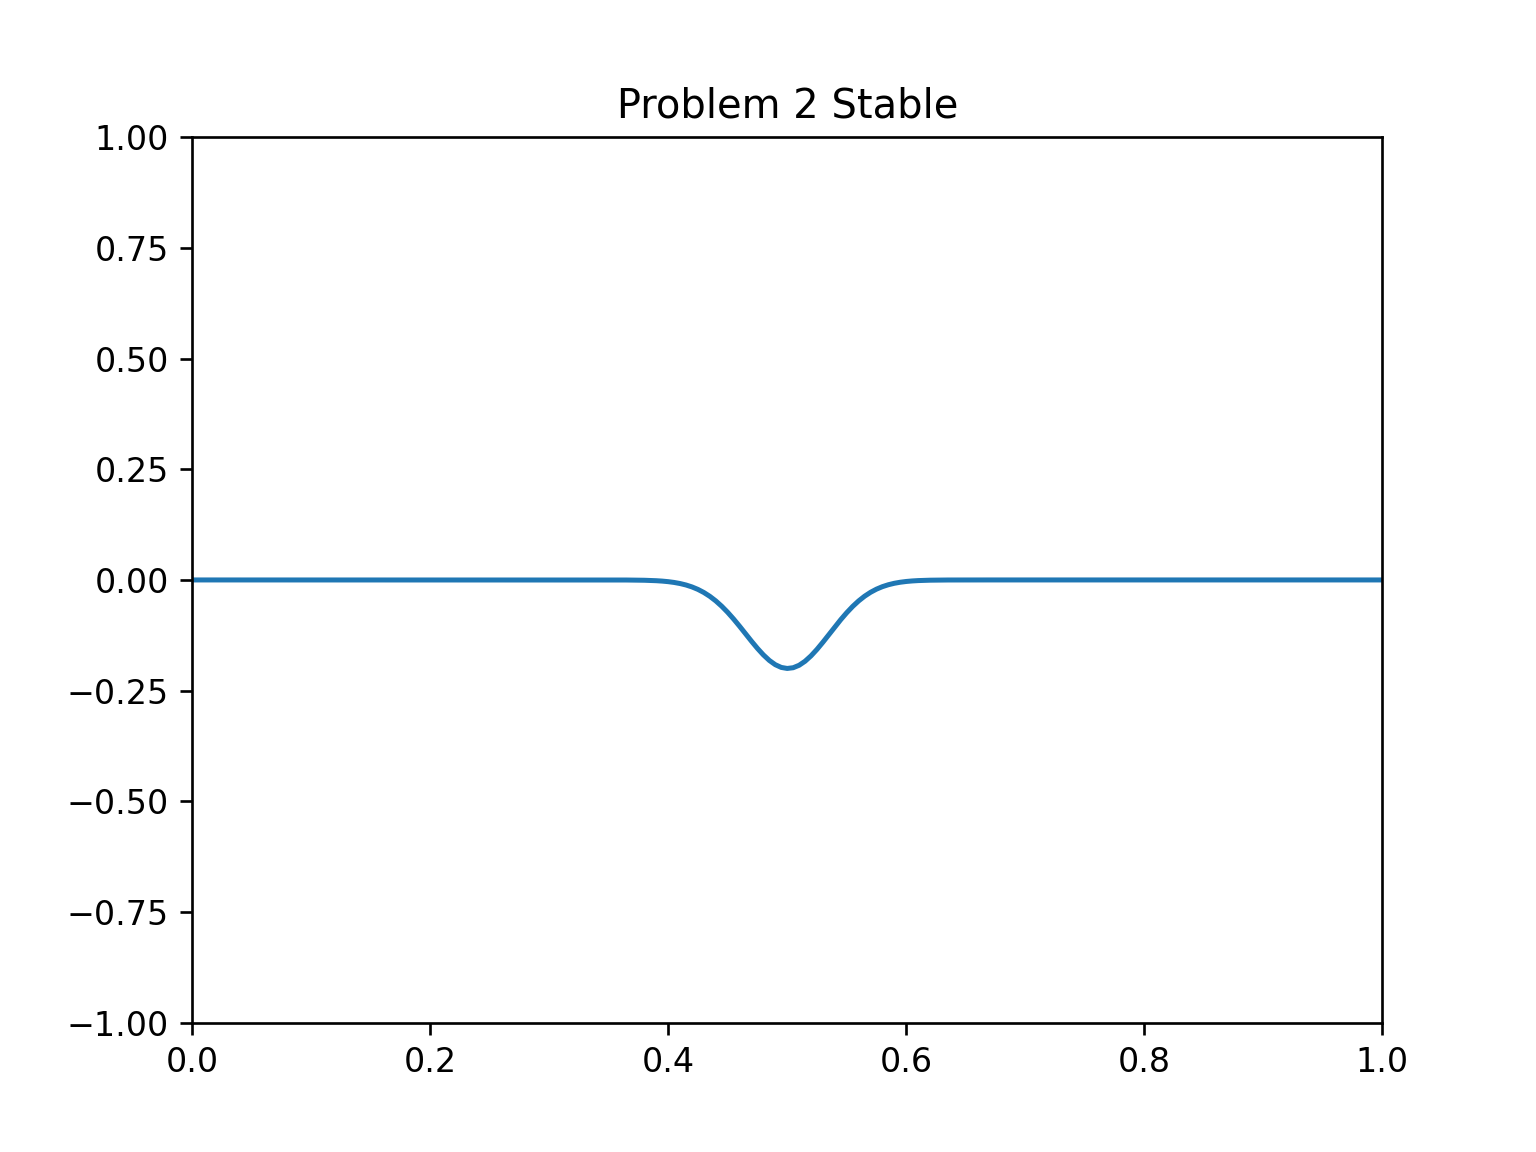

In [7]:
U = np.zeros((M+1,J+1)) #same method as in problem 1

U[0][1:-1] = f(x_grid[1:-1])
U[1][1:-1] = U[0][1:-1] + delt_t*g(x_grid[1:-1]) + (1/2)*(lambd**2)*(U[0][:-2] - 2*U[0][1:-1] + U[0][2:])

A = np.zeros((J+1, J+1))
np.fill_diagonal(A, 2*(1-lambd**2))
np.fill_diagonal(A[1:,:-1], lambd**2)
np.fill_diagonal(A[:-1, 1:], lambd**2)
#Calculate the rest of the rows of U
for i in range(2, M+1):
    U[i] = A@U[i-1] - U[i-2]
    U[i,0], U[i,-1] = 0,0


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1,1))
ax.set_title("Problem 2 Stable")

line, = plt.plot([],[],)

def update(i):
    line.set_data(x_grid,U[i])
    return line

plt.show()

anim = ani.FuncAnimation(fig,update,frames=range(M+1),interval=10)
anim.save('prob2b.mp4')

<video src="prob2.mp4" controls>

<video src="prob2b.mp4" controls>

# Problem 3

Consider the initial boundary value problem
$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = 0.2e^{-m^2(x-1/2)^2}\\
	u_t(x,0) = 0.
$$
The initial condition separates into two smaller, slower-moving pulses, one travelling to the right and the other to the left.
This solution models, for example, a plucked guitar string

Numerically approximate the solution $u(x,t)$ for $t \in \left[0,2\right]$.
Set $m=20$.
Use 200 subintervals in space and 440 in time, and animate your results.
It is rather easy to see that the solution to this problem is the sum of two travelling waves, one travelling to the left and the other to the right, as described earlier.

In [8]:
s = 1 #new conditions for new problem
m = 20
f = lambda x: .2*np.exp(-m**2 * (x-.5)**2)
g = lambda x: np.zeros_like(x)
J,M = 200,440
a_t,b_t = 0,2
a_x,b_x = 0,1
delt_t = (b_t-a_t)/M
delt_x = (b_x-a_x)/J
lambd = (s*delt_t)/delt_x
x_grid = np.linspace(a_x,b_x,J+1)

<IPython.core.display.Javascript object>


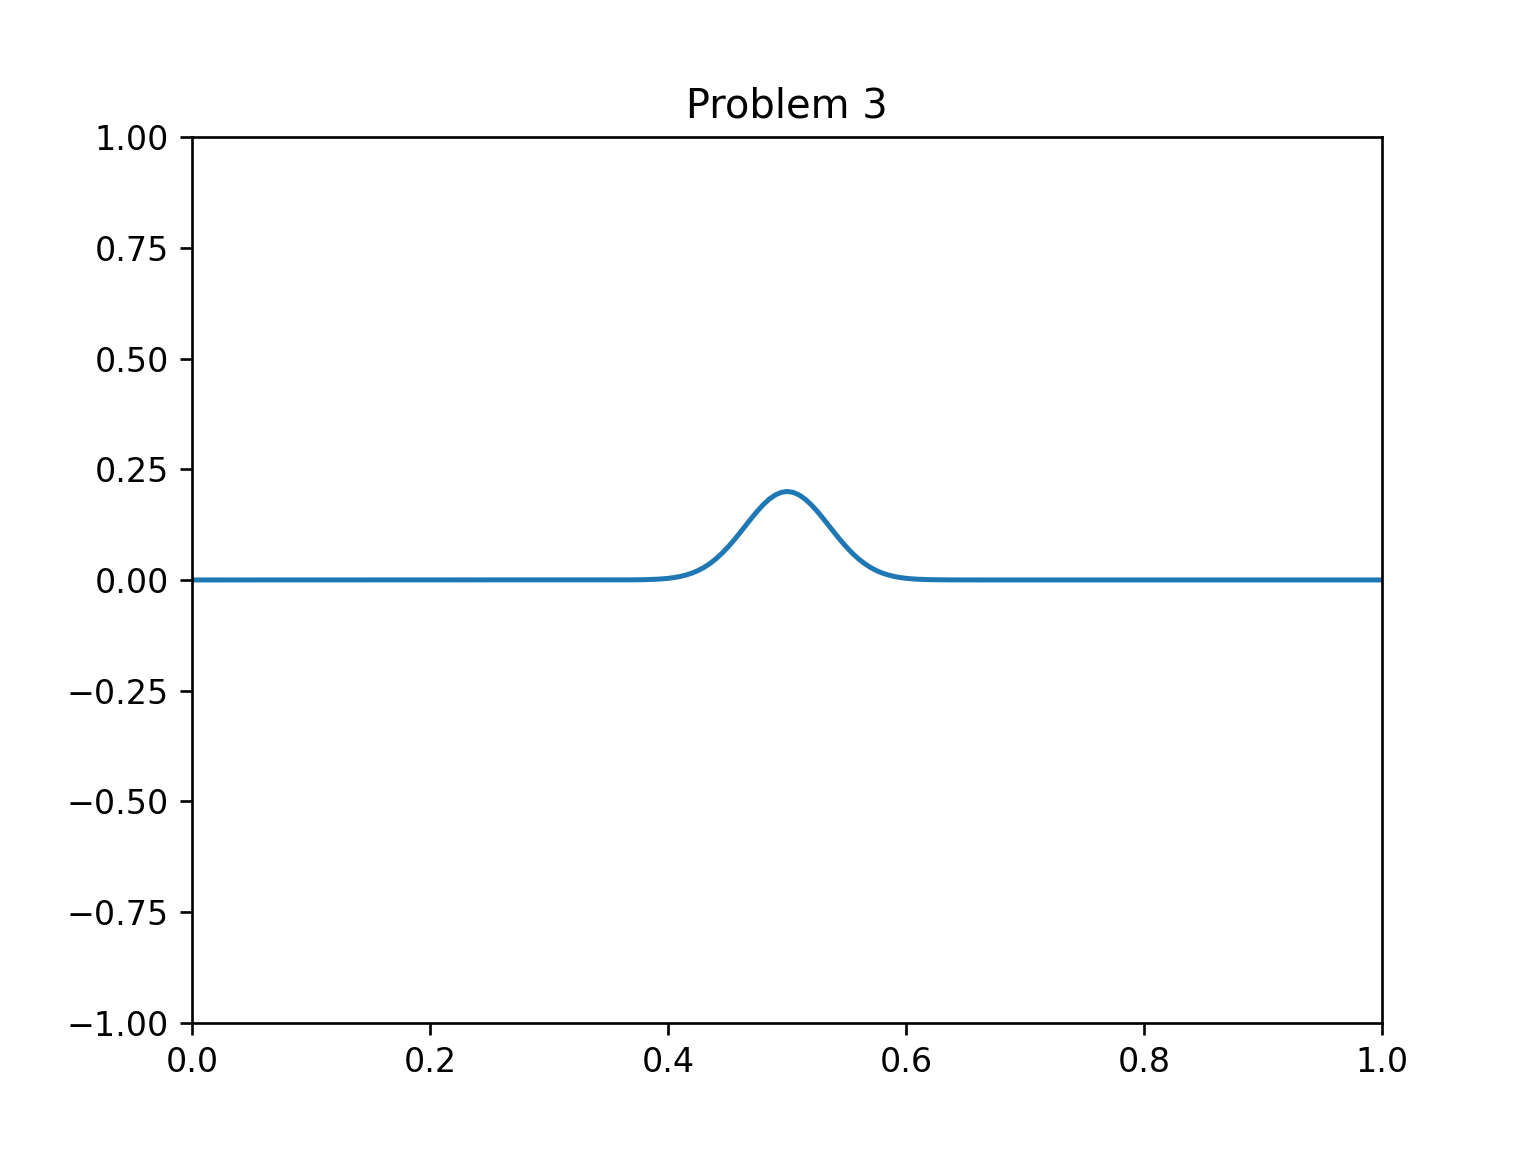

In [9]:
U = np.zeros((M+1,J+1)) #same method as in first problem

U[0][1:-1] = f(x_grid[1:-1])
U[1][1:-1] = U[0][1:-1] + delt_t*g(x_grid[1:-1]) + (1/2)*(lambd**2)*(U[0][:-2] - 2*U[0][1:-1] + U[0][2:])

A = np.zeros((J+1, J+1))
np.fill_diagonal(A, 2*(1-lambd**2))
np.fill_diagonal(A[1:,:-1], lambd**2)
np.fill_diagonal(A[:-1, 1:], lambd**2)
#Calculate the rest of the rows of U
for i in range(2, M+1):
    U[i] = A@U[i-1] - U[i-2]
    U[i,0], U[i,-1] = 0,0


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1,1))
ax.set_title("Problem 3")

line, = plt.plot([],[],)

def update(i):
    line.set_data(x_grid,U[i])
    return line

plt.show()

anim = ani.FuncAnimation(fig,update,frames=range(M+1),interval=10)
anim.save('prob3.mp4')

<video src="prob3.mp4" controls>

# Problem 4

Consider the initial boundary value problem

$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = \begin{cases} 1/3 & \text{if } 5/11 < x < 6/11,\\
	0 & \text{otherwise}
	\end{cases}\\
	u_t(x,0) = 0.
$$

Numerically approximate the solution $u(x,t)$ for $t \in \left[0, 2\right]$.
Use 200 subintervals in space and 440 in time, and animate your results.
Even though the method is second order and stable for this discretization, since the initial condition is discontinuous there are large dispersive errors.

In [10]:
J,M=200,440
s = 1
f = lambda x: np.array([1/3 if el < 6/11 and el > 5/11 else 0 for el in x])
g = lambda x: np.zeros_like(x)
a_x,b_x = 0,1
a_t,b_t = 0,2
delt_t = (b_t-a_t)/M
delt_x = (b_x-a_x)/J
lambd = (s*delt_t)/delt_x
x_grid = np.linspace(a_x,b_x,J+1)

<IPython.core.display.Javascript object>


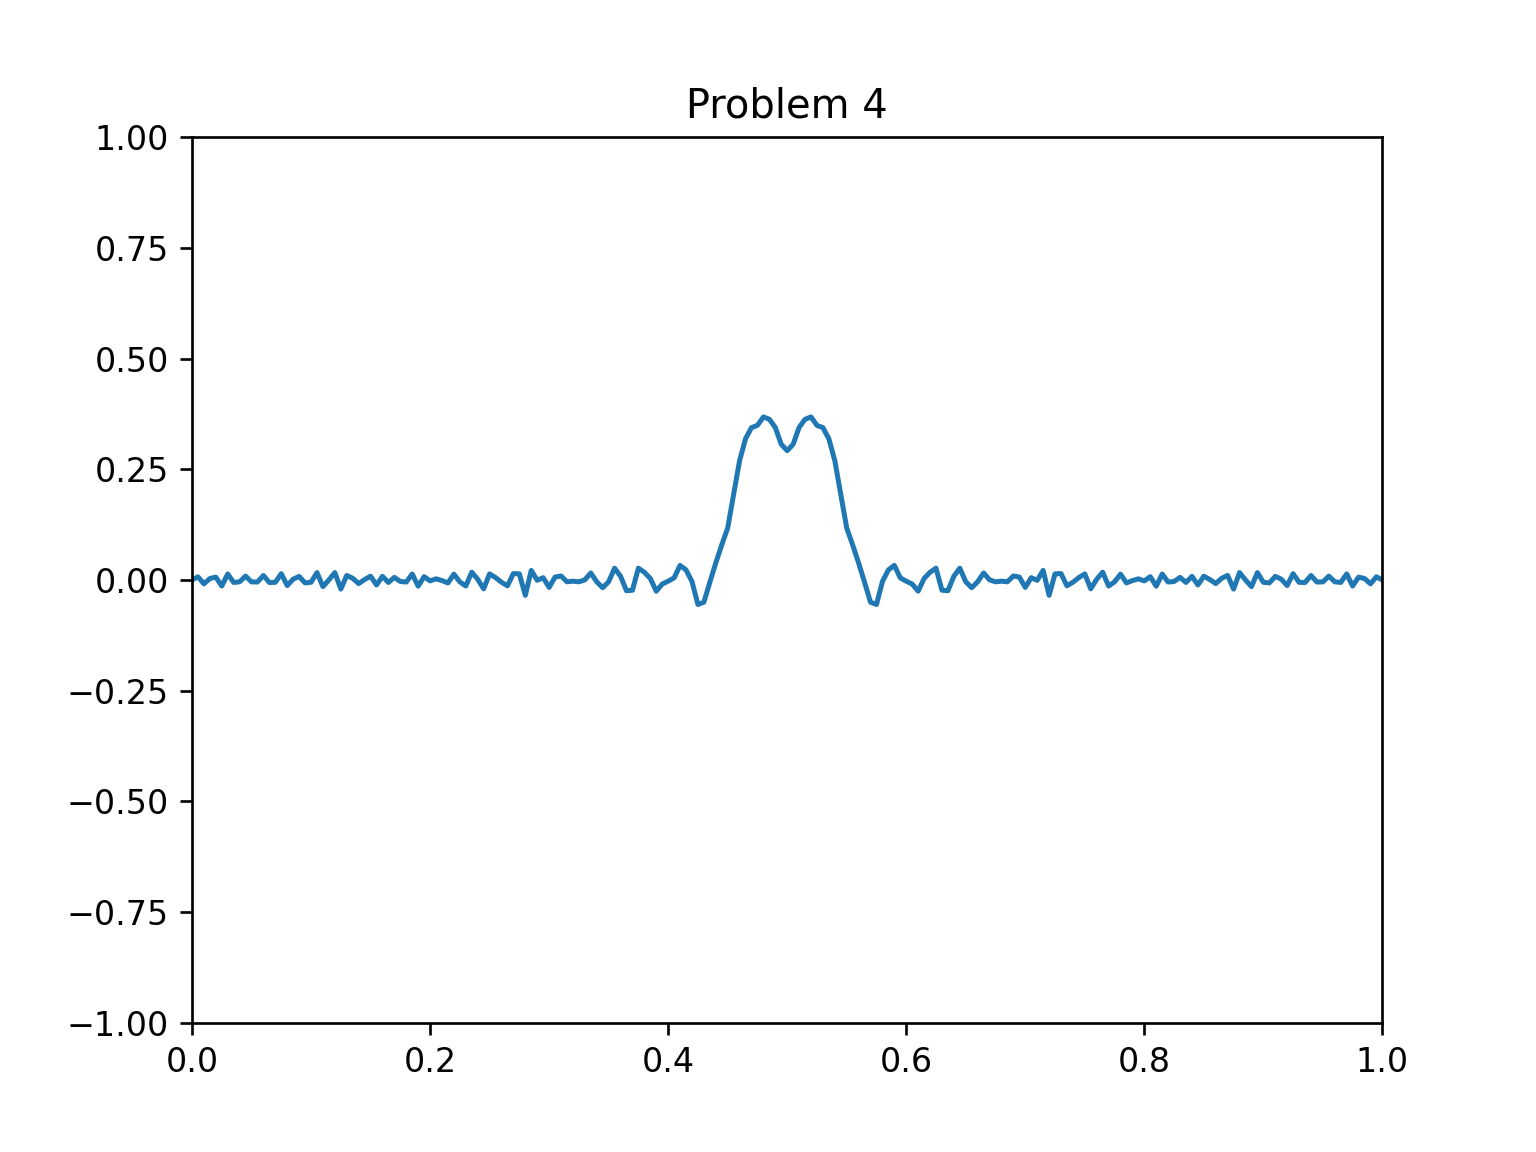

In [11]:
U = np.zeros((M+1,J+1))

U[0][1:-1] = f(x_grid[1:-1])
U[1][1:-1] = U[0][1:-1] + delt_t*g(x_grid[1:-1]) + (1/2)*(lambd**2)*(U[0][:-2] - 2*U[0][1:-1] + U[0][2:])

A = np.zeros((J+1, J+1))
np.fill_diagonal(A, 2*(1-lambd**2))
np.fill_diagonal(A[1:,:-1], lambd**2)
np.fill_diagonal(A[:-1, 1:], lambd**2)
#Calculate the rest of the rows of U

for i in range(2, M+1):
    U[i] = A@U[i-1] - U[i-2]
    U[i,0], U[i,-1] = 0,0


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1,1))
ax.set_title("Problem 4")

line, = plt.plot([],[],)

def update(i):
    line.set_data(x_grid,U[i])
    return line

plt.show()

anim = ani.FuncAnimation(fig,update,frames=range(M+1),interval=10)
anim.save('prob4.mp4')

In [12]:
# plt.plot(x_grid,U[0])
# plt.ylim(-1,1)
# plt.show()
# plt.plot(x_grid,U[21])
# plt.ylim(-1,1)
# plt.show()

<video src="prob4.mp4" controls>

# Problem 5


Numerically solve the initial value problem

$$
	u_t -su_x + uu_x = u_{xx}, \quad x \in (-\infty,\infty),\\
	u(x,0) = v(x),
$$

for $t \in [0,1]$.
Let the perturbation $v(x)$ be given by

$$
v(x) = 3.5(\sin{(3x)} + 1)\frac{1}{\sqrt{2\pi}} \exp{(-x^2/2)}
$$

And let the initial condition be $u(x, 0) = \hat{u}(x) + v(x)$
Approximate the $x$ domain,$(-\infty, \infty)$, numerically by the finite interval $[-20,20]$, and fix $u(-20) = u_-$, $u(20) = u_+$. Let $u_- = 5$, $u_+ = 1$.
Use 150 intervals in space and 350 steps in time.
Animate your results.
You should see the solution converge to a translate of the travelling wave $\hat{u}$.

Hint: This difference scheme is no longer a linear equation.
We have a nonlinear equation in $U^{n+1}$.
We can still solve this function using Newton's method or some other similar solver.
In this case, use `scipy.optimize.fsolve`.

In [13]:
#optimize this function
def func(U1,U0,s,k1,k2):
    n = U1.shape[-1]
    errs = [U1[j] - U0[j] - k1*((s-U1[j])*(U1[j+1]-U1[j-1])+(s-U0[j])*(U0[j+1]-U0[j-1])) - k2*((U1[j+1]-2*U1[j]+U1[j-1])+(U0[j+1]-2*U0[j]+U0[j-1])) for j in range(1, n-1)]
    errs = [U1[0] - U0[0]] + errs + [U1[-1]-U0[-1]]
    return errs

In [14]:
a_x,b_x = -20,20
a_t,b_t = 0,1
J,M = 150,350
delt_x = (b_x-a_x)/J
delt_t = (b_t-a_t)/M
k1,k2= (delt_t)/(4*delt_x), (delt_t)/(2*(delt_x**2))
u_neg,u_pos = 5,1
x_grid = np.linspace(a_x,b_x,J+1)
a = (u_pos-u_neg)/2
s = 3

U = np.zeros((M+1,J+1)) #intiialize solution
U[0,0],U[0,-1] = u_neg,u_pos

v = lambda x: 3.5*(np.sin(3*x)+1)*(1/np.sqrt(2*np.pi))*np.exp(-.5*x**2) #dominant fuctions
uhat = lambda x: s - a*np.tanh(a*x/2)

U[0][1:J+1] = [uhat(x_j)+v(x_j) for x_j in x_grid[1:J+1]] #breadstick method
init_guess = U[0]

for i in range(1,M+1):
    U[i] = scipy.optimize.fsolve(func,init_guess,args=(U[i-1],s,k1,k2)) #optimization
    
fig = plt.figure() #set up the visualization
ax = fig.add_subplot(111)
ax.set_xlim((-20,20))
ax.set_ylim((0,6))
ax.set_title("Problem 5")

line, = plt.plot([],[])

def update(i):
    line.set_data(x_grid,U[i])
    
anim = ani.FuncAnimation(fig,update,frames=range(M+1),interval=10)
anim.save("Problem5.mp4")

<video src="Problem5.mp4" controls>

<IPython.core.display.Javascript object>


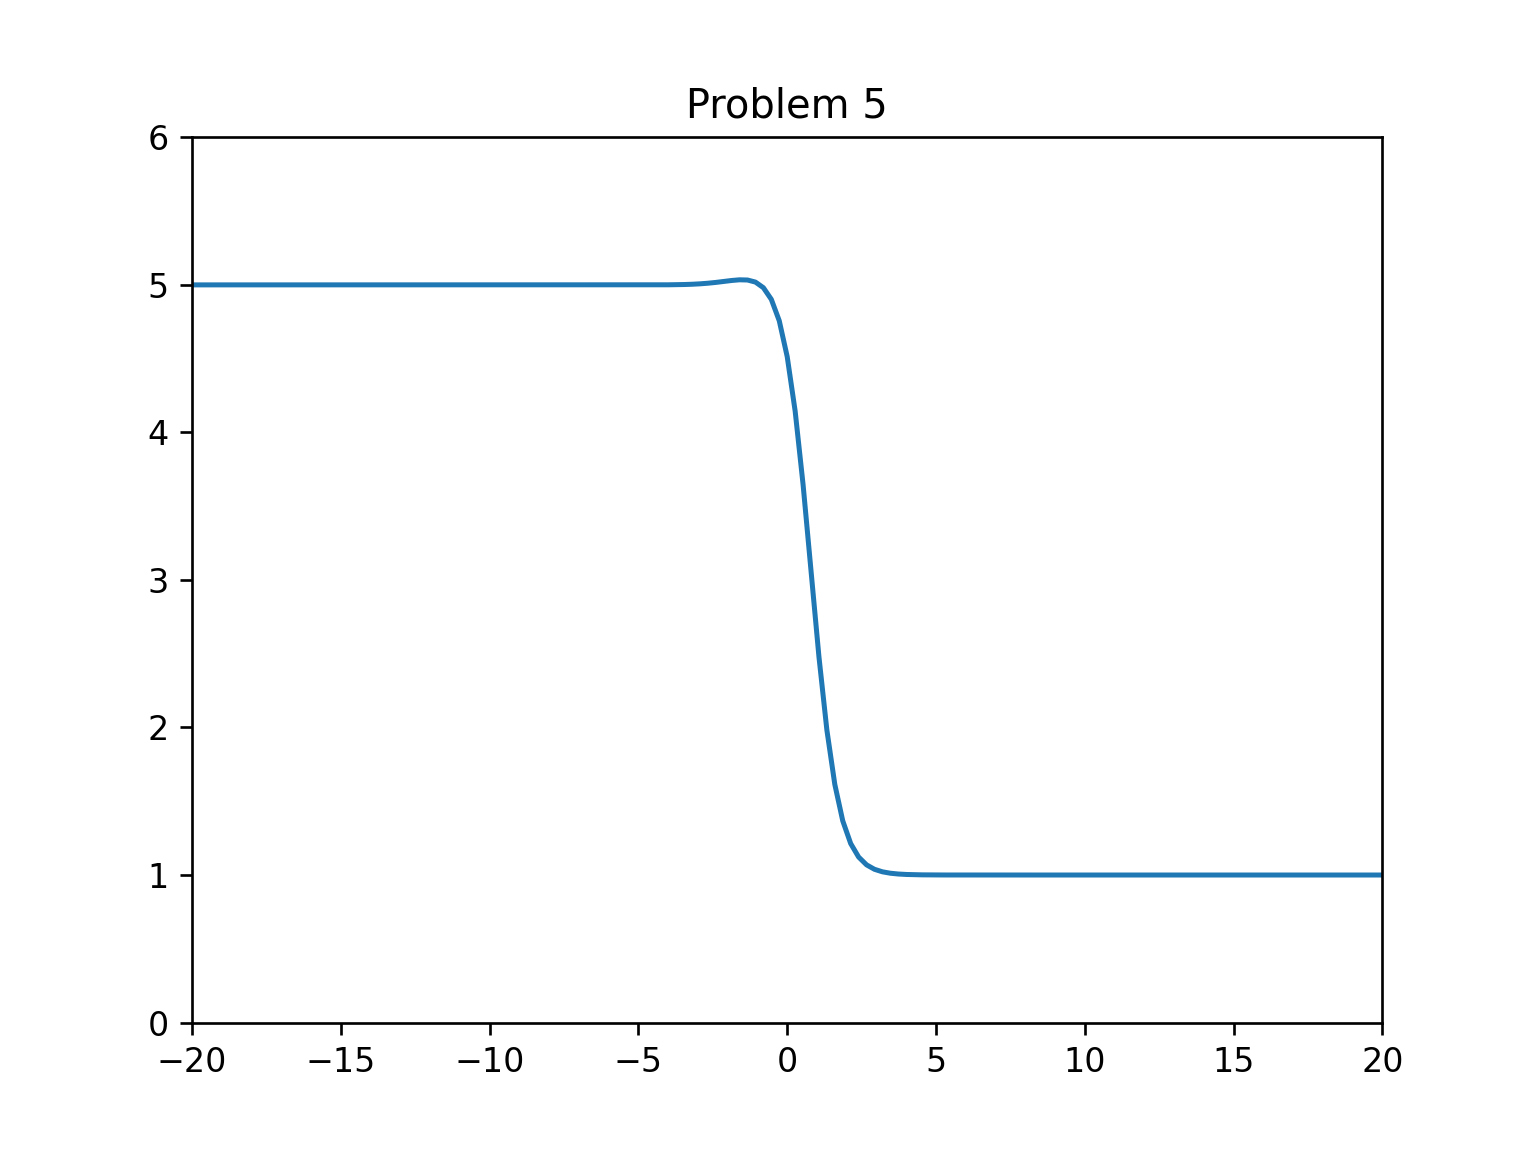

<IPython.core.display.Javascript object>


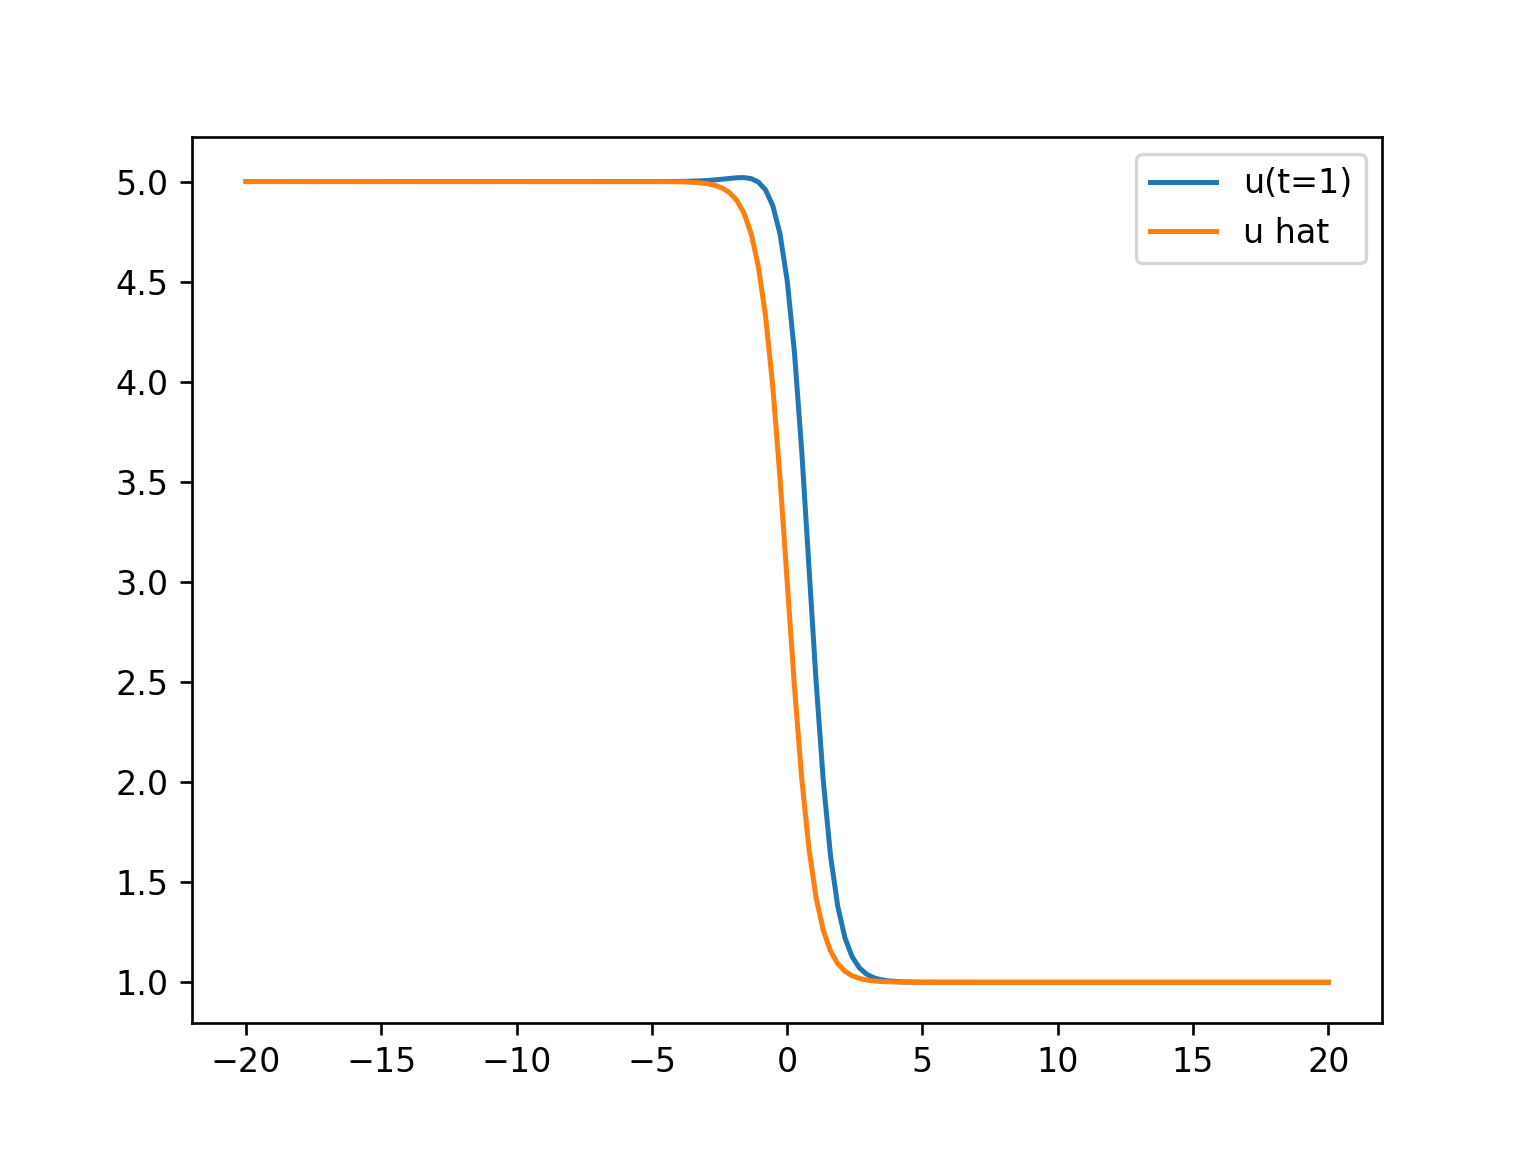

In [15]:
fig = plt.figure()
plt.plot(x_grid, U[-1], label="u(t=1)")
plt.plot(x_grid, uhat(x_grid), label="u hat")
plt.legend()
plt.show()

In [ ]:
#great work sammy!